<a href="https://colab.research.google.com/github/duchaba/Norwegian_Blue_Parrot_k2fa_AI/blob/master/Duc_Haba_Linear_Model_and_Neural_Network_from_Scratch_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Model and Neural Network from Scratch Challenge

🤠 The big challenge is converting Jeremy's spreadsheet to Python code independently.

You may attend or watch session #4. Thus, you know how Jeremy recreates it step by step with Python, Pandas, and Numpy. That is OK, but for the challenge, you can't use the "Linear Model and Neural Network from Scratch" Jupyter Notebook on Kaggle.

If Jeremy can do it on Exel, surely you (and I) can do it with Python. The below layout is a step-by-step challenge. Re-watching session #3 is allowed (but not session #4). It is OK to use Stackoverflow and any resource on the Net.


👍 WHY?

- If you can do this, then you are Top Gun, i.e., you understand the core concepts of Neural networks, aka Deep Learning.

- The goal is NOT to write the most compact and elegant code, but it is for YOU to understand how to code it.

- ...and because it is a fun brain teaser. 

## 1: Download the Titanic data

- If you don't have an account sign up with https://kaggle.com

- You need an API key to use the Kaggle API.

1. click on your profile picture on the Kaggle website (https://kaggle.com)

2. choose My Account
1. click Create New API Token. This will save a file called kaggle.json to your PC.
1. You need to copy this key. To do so, open the file you downloaded, copy the contents
1. paste them in the following cell (e.g., creds = '{"username":"xxx","key":"xxx"}'):

😀 HINTS

I know how hard it is to begin, and many are held back because they can't download the data. It's frustrating to be stumped by the first step. So, I break the rule and share Step #1 code here.

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


✋ STOP

- You must get the "creds" from the above steps and set the "creds" correctly.

In [3]:
# Must give Kaggle credit from above
creds = '{"username":"duchaba","key":"0c737c90feacb5c56232b0d7c24e8664"}'

In [4]:
import pathlib

In [5]:
cred_path = pathlib.Path('~/.kaggle/kaggle.json').expanduser()
print(cred_path)

/root/.kaggle/kaggle.json


In [6]:
cred_path.parent.mkdir(exist_ok=True)

In [7]:
cred_path.write_text(creds)

63

In [8]:
cred_path.chmod(0o600)

In [9]:
#check it
!ls -l {cred_path}
!cat {cred_path}

-rw------- 1 root root 63 May 28 03:51 /root/.kaggle/kaggle.json
{"username":"duchaba","key":"0c737c90feacb5c56232b0d7c24e8664"}

In [10]:
import kaggle

✋ STOP

- You must join the Kaggel compition, so you can be granted the permission to download the data.

- https://www.kaggle.com/competitions/titanic 

In [11]:
import zipfile

In [12]:
path = pathlib.Path('titanic')

In [13]:
kaggle.api.competition_download_cli(str(path))

100%|██████████| 34.1k/34.1k [00:00<00:00, 6.57MB/s]

In [14]:
zipfile.ZipFile(f'{path}.zip').extractall(path)

In [15]:
#check it
!ls -l {path}

total 92
-rw-r--r-- 1 root root  3258 May 28 03:51 gender_submission.csv
-rw-r--r-- 1 root root 28629 May 28 03:51 test.csv
-rw-r--r-- 1 root root 61194 May 28 03:51 train.csv


✋ STOP

- From this point onward you are on your own. 

- Happy hacking. 

## 2: Import to Pandas, display, and analyze the data

- Here is the spreadsheet display that you try to replicate using Pandas.

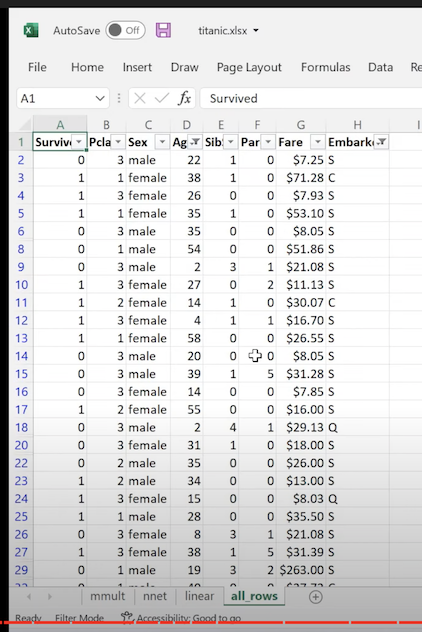

👍 NOTES

- Don't forget to use graphs like line chart and histogram to analysing the data.

Let's create a class/object because I am old school, and call it "BooBoo"

In [16]:
# create class
class NNet(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Duc Haba"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    #
    self.fname_id = 0
    self.dname_img = "img_colab/"
    self.dname_data = "tsrw_data/"
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%34s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 34, ":", "-" * 34)
    return
  # 
  def _pw(self,a,b):
    if b:
      self._pp("status", a)
    return
  #
# ---end of class
#
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator
#
# instatiate it
booboo = NNet("Boo-Boo")

---------------------------------- : ----------------------------------
                        Hello from : NNet
                         Code name : Boo-Boo
                         Author is : Duc Haba
---------------------------------- : ----------------------------------


In [17]:
print (path.expanduser())

titanic


In [18]:
# keep it 
booboo.data_path = path

In [19]:
# keep it
booboo.train_file = booboo.data_path.joinpath("train.csv")
booboo.test_file = booboo.data_path.joinpath("test.csv")

In [20]:
import pandas

In [21]:
df = pandas.read_csv(booboo.train_file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df.drop(columns=["PassengerId", "Name", "Ticket","Cabin"],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [68]:
df.plot?

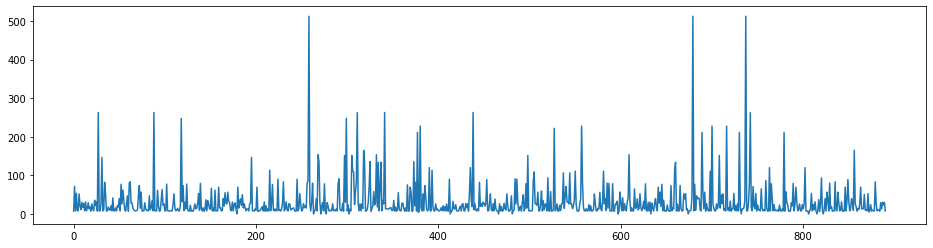

In [23]:
df["Fare"].plot(kind="line",figsize=(16,4))

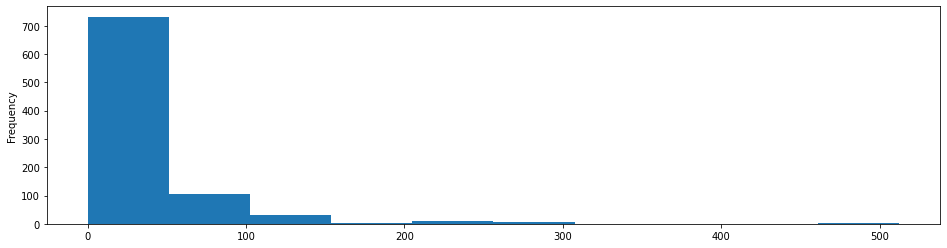

In [24]:
df["Fare"].plot(kind="hist",figsize=(16,4))

- First class is expensive.

In [25]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

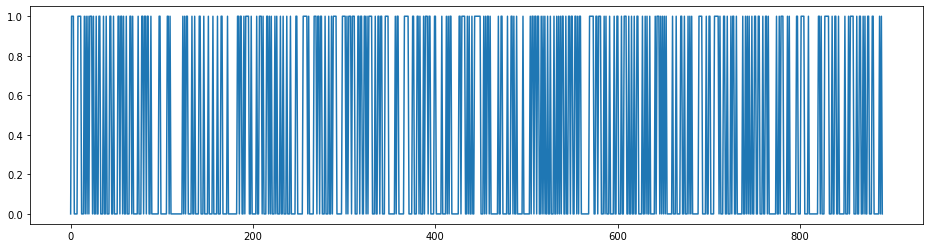

In [79]:
df["Survived"].plot(kind="line",figsize=(16,4))

- Ops, that didn't say much.

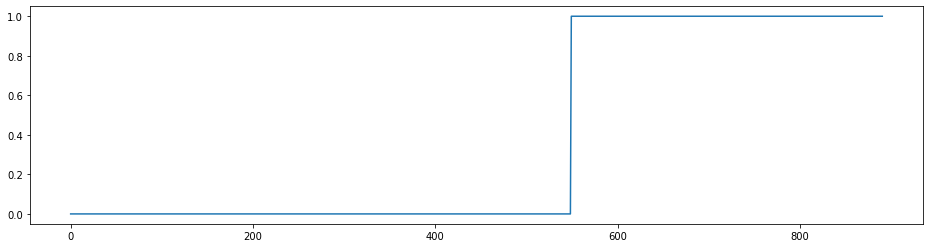

In [26]:
df["Survived"].sort_values().reset_index(drop=True).plot(kind="line",figsize=(16,4))

- See if I can do bar chart

In [27]:
df["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [28]:
df2 = df.groupby(['Survived'])['Survived'].count()
print(df2)

Survived
0    549
1    342
Name: Survived, dtype: int64


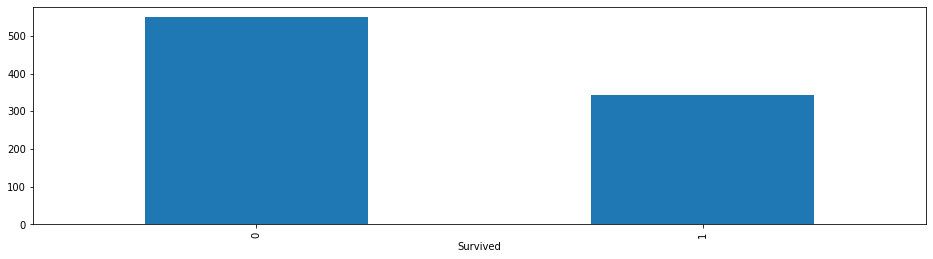

In [29]:
df.groupby(['Survived'])['Survived'].count().plot(kind="bar",figsize=(16,4))

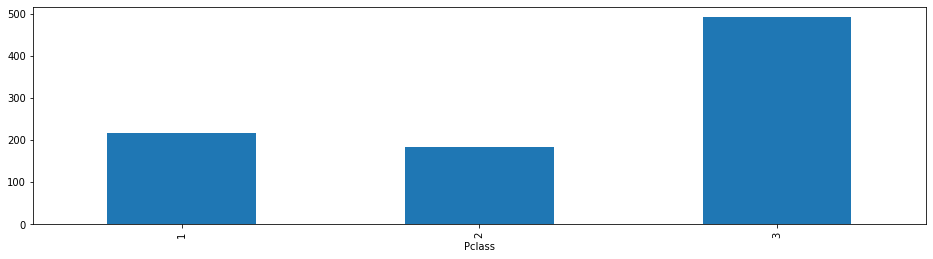

In [30]:
df.groupby(['Pclass'])['Pclass'].count().plot(kind="bar",figsize=(16,4))

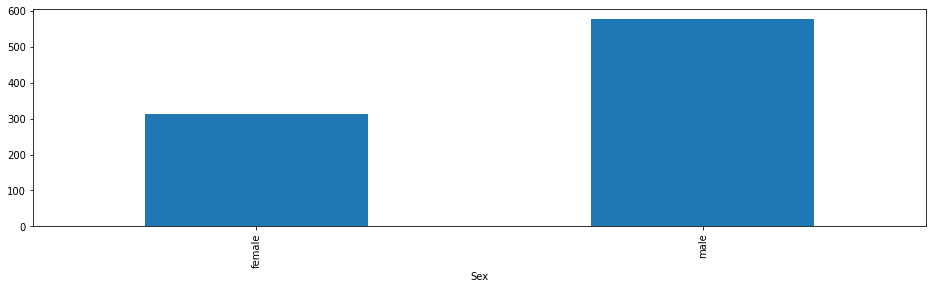

In [31]:
df.groupby(['Sex'])['Sex'].count().plot(kind="bar",figsize=(16,4))

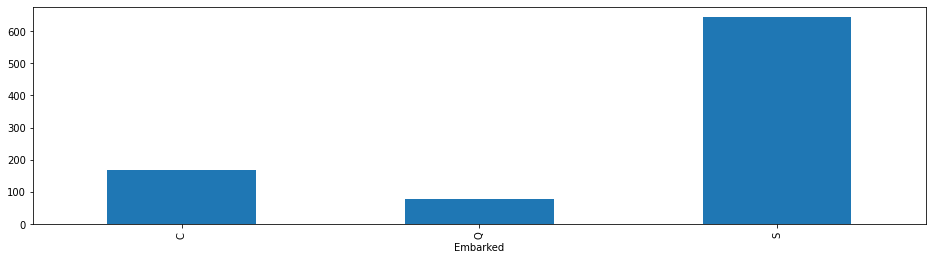

In [32]:
df.groupby(['Embarked'])['Embarked'].count().plot(kind="bar",figsize=(16,4))

## 3: Remove Rows that have missing data

- We know that this is NOT recomended, but it is acceptable.

- If you want to do more advance methods, go for it.


In [33]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [41]:
df[df["Age"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


- so where is the other TWO NaN?

In [42]:
df[df["Pclass"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [43]:
df[df["Sex"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [44]:
df[df["SibSp"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [45]:
df[df["Parch"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [46]:
df[df["Embarked"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


- Ah ha, found you.

- So to delete or to augmented? Why not? be advantageous.

In [34]:
import numpy

In [35]:
guess_age = numpy.round(df["Age"].mean())
print (guess_age)

30.0


In [36]:
df["Age"].fillna(guess_age, inplace=True)

In [37]:
# check it
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [38]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [39]:
df["Embarked"].fillna("S", inplace=True)

In [40]:
# check it
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


- Yahoo, done it

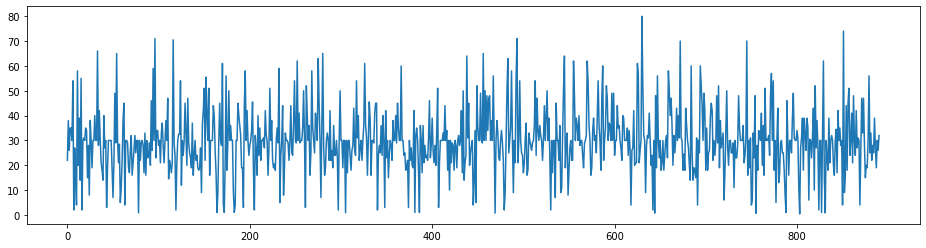

In [41]:
df["Age"].plot(kind="line",figsize=(16,4))

- Sort it from young to old

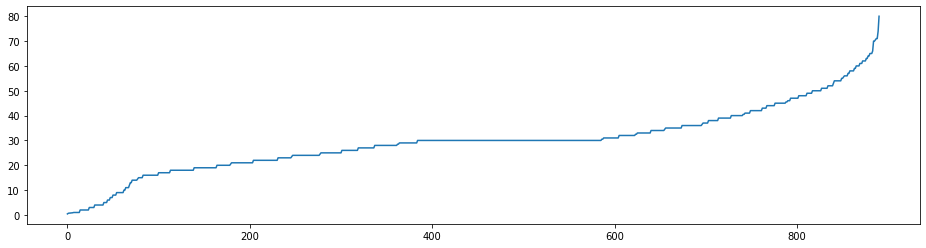

In [42]:
df["Age"].sort_values().reset_index(drop=True).plot(kind="line",figsize=(16,4))

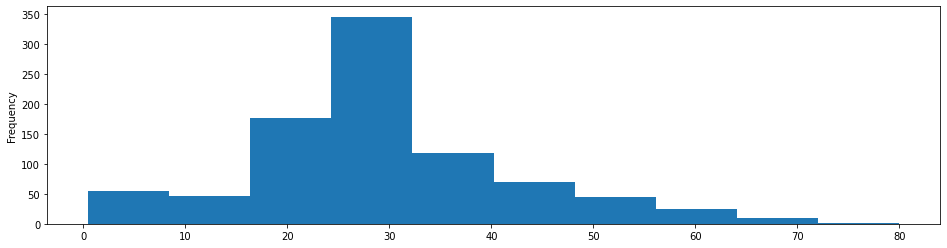

In [43]:
df["Age"].plot(kind="hist",figsize=(16,4))

- Not surprising because I set the NaN to be 30.0
- A lot of passingers are kids

In [44]:
# save it.
booboo.df_raw_train = df.copy()

## 4: Normalize and encoding category column to be coefficient 

- Encode columns (using Pandas)
  - Embarked
  - Pclass
  - sex
- Convert "Fares" to log of Fares
- Normalize "age" to age/max(age) , i.e. between 0 and 1
- Add constant (one) column fill with 1.

- Your final data should look like the spreadsheet image below.

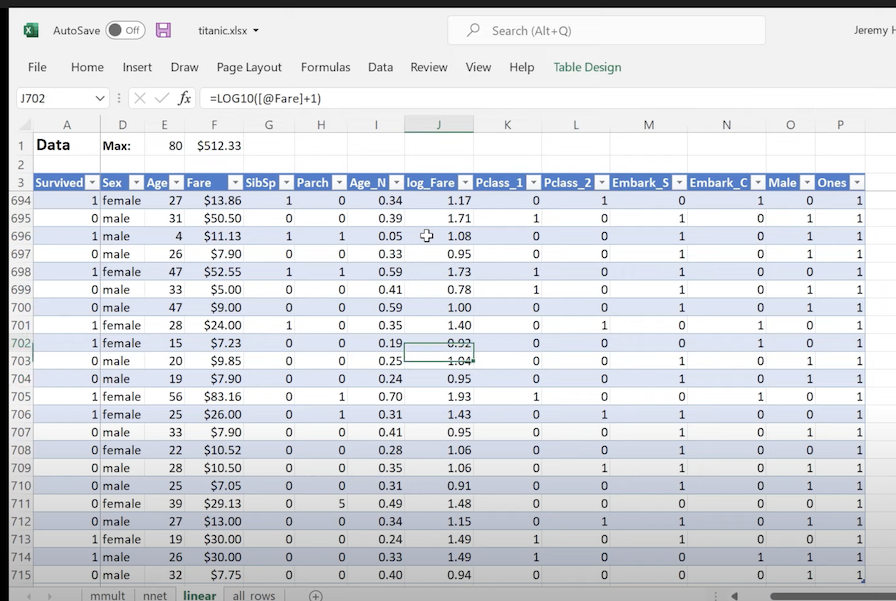

👍 HINTS

- It is OK to rewatch session/video #3 (but not video #4)
- Video index 1:03:00 onward.

### Encoding

Embarked (see graph in step #2)
- "S" most
- "C" second most
- "Q" last

In [45]:
df = booboo.df_raw_train.copy()

In [46]:
df["is_S"] = 0.0

In [47]:
df.loc[df['Embarked'] == "S", 'is_S'] = 1.0

In [50]:
#check it
df[["Embarked", "is_S"]].head(10)

,Embarked,is_S
0,S,1.0
1,C,0.0
2,S,1.0
3,S,1.0
4,S,1.0
5,Q,0.0
6,S,1.0
7,S,1.0
8,S,1.0
9,C,0.0


- convert to a booboo function 

In [55]:
# add method
@add_method(NNet)
def encode_column(self, dfx, col, new_col, default_val, new_val, cond):
  dfx[new_col] = default_val
  dfx.loc[dfx[col] == cond, new_col] = new_val
  display(dfx[[col, new_col]].head(10))
  return 

- Easy peazy

In [52]:
booboo.encode_column(df,"Embarked", "is_C", 0.0, 1.0, "C")

,Embarked,is_C
0,S,0.0
1,C,1.0
2,S,0.0
3,S,0.0
4,S,0.0
5,Q,0.0
6,S,0.0
7,S,0.0
8,S,0.0
9,C,1.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_S,is_C
0,0,3,male,22.0,1,0,7.2500,S,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,0.0,1.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,0.0
887,1,1,female,19.0,0,0,30.0000,S,1.0,0.0
888,0,3,female,30.0,1,2,23.4500,S,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,0.0,1.0


Pclass 1 and 3 (see graph in step #2)

In [56]:
booboo.encode_column(df,"Pclass", "is_P1", 0.0, 1.0, 1)

,Pclass,is_P1
0,3,0.0
1,1,1.0
2,3,0.0
3,1,1.0
4,3,0.0
5,3,0.0
6,1,1.0
7,3,0.0
8,3,0.0
9,2,0.0


In [57]:
booboo.encode_column(df,"Pclass", "is_P3", 0.0, 1.0, 3)

,Pclass,is_P3
0,3,1.0
1,1,0.0
2,3,1.0
3,1,0.0
4,3,1.0
5,3,1.0
6,1,0.0
7,3,1.0
8,3,1.0
9,2,0.0


- lastly for male, see graph in step #2

In [58]:
booboo.encode_column(df,"Sex", "is_M", 0.0, 1.0, "male")

,Sex,is_M
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0
5,male,1.0
6,male,1.0
7,male,1.0
8,female,0.0
9,female,0.0


In [59]:
# check it
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_S,is_C,is_P1,is_P3,is_M
0,0,3,male,22.0,1,0,7.2500,S,1.0,0.0,0.0,1.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,0.0,1.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,1.0,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,0.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,1.0,0.0,1.0,0.0,0.0
888,0,3,female,30.0,1,2,23.4500,S,1.0,0.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,0.0,1.0,1.0,0.0,1.0


- drop the column we don't need anymore

In [60]:
df.drop(columns=["Pclass", "Sex", "Embarked"],inplace=True)
df

,Survived,Age,SibSp,Parch,Fare,is_S,is_C,is_P1,is_P3,is_M
0,0,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,1.0
1,1,38.0,1,0,71.2833,0.0,1.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,1.0,0.0,0.0,1.0,0.0
3,1,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1.0,0.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,1.0,0.0,1.0,0.0,0.0
888,0,30.0,1,2,23.4500,1.0,0.0,0.0,1.0,0.0
889,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,1.0


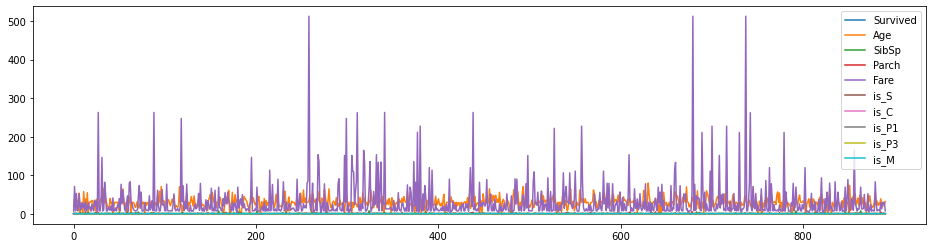

In [62]:
# graph it for the fun of it
df.plot(kind="line",figsize=(16,4))

### Normalize

- Convert "Fare" to log of Fare

- Normalize "age" to age/max_age (i.e. between 0 and 1)

0 Add constant (one) column fill with 1.

In [63]:
import numpy

In [66]:
# can't take log of zero, so make any zero fair to be $1.10
df.loc[df['Fare'] == 0, 'Fare'] = 1.1

In [67]:
df["fare_log"] = numpy.log(df["Fare"])

In [68]:
max_age = df["Age"].max()
print(max_age)

80.0


In [70]:
df["age_n"] = df["Age"] / max_age
df[["Age","age_n"]].head()

,Age,age_n
0,22.0,0.2750
1,38.0,0.4750
2,26.0,0.3250
3,35.0,0.4375
4,35.0,0.4375


In [71]:
# drop the Fare and Age
df.drop(columns=["Fare", "Age"],inplace=True)
df

,Survived,SibSp,Parch,is_S,is_C,is_P1,is_P3,is_M,fare_log,age_n
0,0,1,0,1.0,0.0,0.0,1.0,1.0,1.981001,0.2750
1,1,1,0,0.0,1.0,1.0,0.0,0.0,4.266662,0.4750
2,1,0,0,1.0,0.0,0.0,1.0,0.0,2.070022,0.3250
3,1,1,0,1.0,0.0,1.0,0.0,0.0,3.972177,0.4375
4,0,0,0,1.0,0.0,0.0,1.0,1.0,2.085672,0.4375
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1.0,0.0,0.0,0.0,1.0,2.564949,0.3375
887,1,0,0,1.0,0.0,1.0,0.0,0.0,3.401197,0.2375
888,0,1,2,1.0,0.0,0.0,1.0,0.0,3.154870,0.3750
889,1,0,0,0.0,1.0,1.0,0.0,1.0,3.401197,0.3250


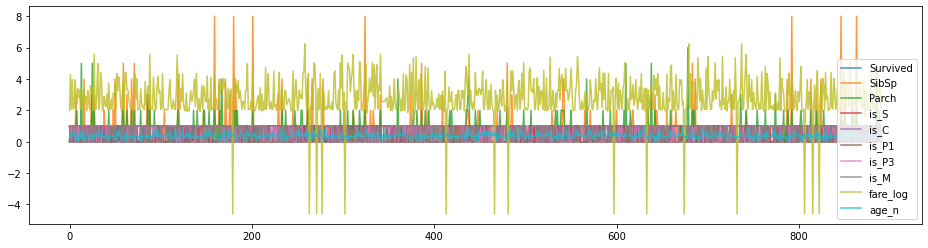

In [74]:
# graph it to see any outliner
df.plot(kind="line",figsize=(16,4), alpha=0.8)

- SibSp look like a few spike too high so why not normalize that too.

In [80]:
df["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [81]:
df["SibSp"] = df["SibSp"] / 8.0

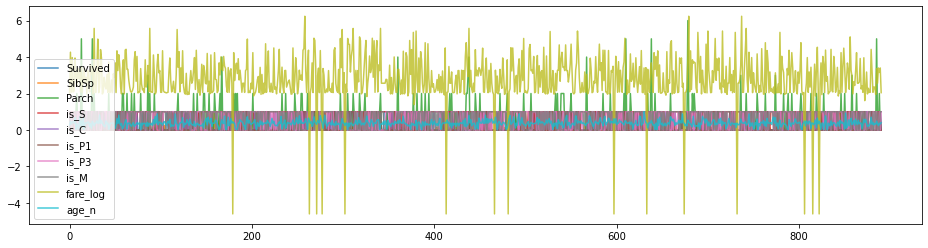

In [82]:
# graph it to see any outliner
df.plot(kind="line",figsize=(16,4), alpha=0.8)

In [83]:
# save it
booboo.df_norm_train = df.copy()

## 5: Random Parameters using Pandas

- The random value between -0.5 and 0.5
- Your final data should look like the spreadsheet image below.

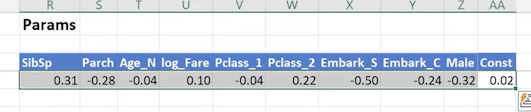

## 6: Sum Product, Linear model

- Multiply the input data (step #4) to the parameter (step #5) - this is your prediction 

- The data should look like the spreadsheet image below.

- Bonus: Graph the actual versus the predictions plots, e.g. line chart, or area chart, etc.

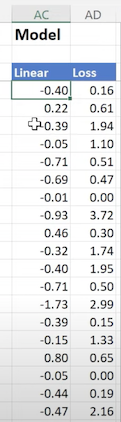

## 7: Loss Function and Prediction

- Calculate the loss function = square(prediction - actual)
- Same image as above #6

## 8: Loss Value

- Calculate the loss value by average(loss) on step #7.

## 9: Gradient Descent 

- Optimize the Loss Value (step #8) using gradient descent (GD).

- This is a tricky bastard. 

- The goal is to get lower Loss Value (step #8).

- HINTS: Using PyTorch GD:
  - requires_grad_()
  - backward()
  - without using GD {with torch.no_grad()} update the prediction with: **pred = pre - (GD * learning_rate)**
  - Use "small" learning_rate. How small? Would like to know :-) ?

✋ STOP

- It is fair game to look up online for help, but you CAN'T use any Jeremy's Notebooks.

## XX: Neural Netwrok

- Going from Regression model above to Neural Network.

- It sounds easy. Increase the number of layer (step #5), add activation layer, and loop it.

- The goal is the same, to lower Loss Value (step #8)

- More power to you if you can do all the above, but for mere mortals, we break it down starting with step #10.


## 10: Hidden Layers

- Create two levels deep by increasing another random Parameter row (step #5).
- The data should look like the spreadsheet image below.

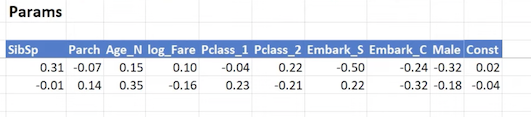

## 11: Activation Layers

- Using rectified linear activation function (ReLU) for activation layer.

- Big name for a simple function :-( == max(0,p)
  - Return a the number or zero if it less then zero; hence, max(0,p)

- The data should look like the spreadsheet image below.

👍 HINTS

- Rewatch session/video #3, (time index: 1:15:00)

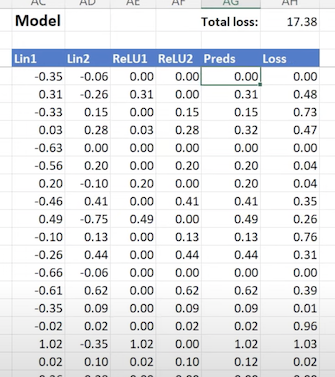

## 12: Prediction from Activation

- Add the two activations (ReLU) (step #11) to get Prediction (Preds column)

## 13: New Loss Value

- The goal is to lower Loss Value, so calculate the loss value same as Step #8

- Use GD (step #9)

- It should be lower. If not then you did something wrong. It should be around 0.8

## 14: Get up and dance. You've done it.

- 🥳 You have done it from step #1 to step #14. Honor system, no cheating.

- You are awarded a Top Gun badge. 🚀

- Go forth and pick your call sign (don't pick "boo-boo" because it's mine.)
- Congratulation.